In [ ]:
!pip install --quiet --upgrade langgraph langchain_google_genai langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
import google.generativeai as gena
from google.colab import userdata
from langchain_core.prompts import ChatPromptTemplate
import os
import google.generativeai as genai
from langchain_google_genai import GoogleGenerativeAI

GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")

genai.configure(api_key=GEMINI_API_KEY)

model = genai.GenerativeModel("gemini-1.5-flash")

llm = GoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model="gemini-1.5-flash")
llm.invoke("hello")

'Hello there! How can I help you today?\n'

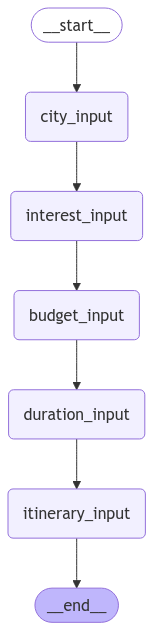

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, END

from IPython.display import Image, display, Markdown


class Trip (TypedDict):
  city_name: str
  interest : str
  budget : str
  duration : str
  ai_response : str

def node_1(state:Trip)->Trip:
  state["city_name"] = input("Enter city name  ")
  return state

def node_2(state:Trip)->Trip:
  state["interest"] = input("Enter interest of your trip  ")
  return state

def node_3(state:Trip)->Trip:
  state["budget"] = input("Enter your budget with currency  ")
  return state

def node_4(state:Trip)->Trip:
  state["duration"] = input("Enter the duration of your trip  ")
  return state


def node_5(state:Trip)->Trip:
  prompt = ChatPromptTemplate.from_template(
    """You are good AI Assistant. When user provide {city}, its{interest}, its{cost} and its{time} generate a personalized trip itinerary.
    Provide itinerary according to the budget given below by user.""")
  result = llm.invoke(prompt.format(city=state["city_name"],cost = state["budget"],interest = state["interest"],time = state["duration"]))
  state["ai_response"] = result
  display(Markdown(state["ai_response"]))
  return state

workflow = StateGraph(Trip)

workflow.add_node("city_input", node_1)
workflow.add_node("interest_input", node_2)
workflow.add_node("budget_input", node_3)
workflow.add_node("duration_input", node_4)
workflow.add_node("itinerary_input", node_5)

workflow.set_entry_point("city_input")
workflow.add_edge("city_input", "interest_input")
workflow.add_edge("interest_input", "budget_input")
workflow.add_edge("budget_input", "duration_input")
workflow.add_edge("duration_input", "itinerary_input")
workflow.add_edge("itinerary_input", END)

graph = workflow.compile()
display(Image(graph.get_graph().draw_mermaid_png()))








In [ ]:
state : Trip = {"city_name":"","interset":"","budget":"","duration":"","ai_response":""}

app = graph.invoke(state)

# from IPython.display import Markdown
# state = node_1(state)
# state = node_2(state)
# state = node_3(state)
# state = node_4(state)
# state = node_5(state)


Enter city name  rawalpindi
Enter interest of your trip  food
Enter your budget with currency  1000rs
Enter the duration of your trip  2 days


## Personalized Rawalpindi Trip Itinerary:

**Budget:** 1000rs

**Duration:** 2 days

**Location:** Rawalpindi, Pakistan

**Interests:** Food

**Day 1:**

* **Morning:** Start your day with a hearty breakfast at **"The Monal"**, a popular restaurant offering stunning views of the city. Enjoy their traditional Pakistani dishes like Halwa Puri, Nihari, and Qeema. (Budget: 300rs)
* **Afternoon:** Take a stroll through **Jinnah Park**, a beautiful green space in the heart of Rawalpindi. Enjoy the fresh air and admire the well-maintained gardens. (Budget: Free)
* **Evening:** Explore the vibrant **Raja Bazaar** area, famous for its street food. Sample delicious snacks like **"Dahi Bhalay"**, **"Chaat"**, and **"Samosas"** from various vendors. (Budget: 200rs)
* **Dinner:** Head to **"Butt Karahi"** in Saddar for a taste of authentic Pakistani cuisine. Indulge in their famous Karahi dishes with naan bread. (Budget: 200rs)

**Day 2:**

* **Morning:** Visit the historical **Tomb of Shah Abdul Latif**, a beautiful architectural marvel and a place of religious significance. (Budget: Free)
* **Afternoon:** Explore the **Rawalpindi Museum**, showcasing the rich history and culture of the city. Learn about the region's heritage through various artifacts and exhibits. (Budget: 100rs)
* **Evening:** Enjoy a farewell dinner at **"The Food Street"**, a popular street food hub offering a wide variety of cuisines. Try some street food favorites like **"Aloo Tikki"**, **"Gol Gappay"**, and **"Falooda"**. (Budget: 200rs)

**Notes:**

* This itinerary is a suggestion and can be customized based on your interests and preferences.
* You can adjust the budget allocation for different activities as per your needs.
* Public transport in Rawalpindi is affordable and easily accessible.
* Be sure to bargain at local markets and street food vendors.
* Enjoy your culinary adventure in Rawalpindi! 
